In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload = files.upload()
df = pd.read_csv("data.csv")
df.head()

Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df = df.dropna(axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
lc_Y = LabelEncoder()
df.iloc[:,1] = lc_Y.fit_transform(df.iloc[:,1].values)


In [8]:
import plotly.graph_objs as go
import plotly.offline as py
import plotly.figure_factory as ff
Malignant = df[(df['diagnosis'] != 0)]
Benign = df[(df['diagnosis'] == 0)]

In [9]:
sketch = go.Bar(x = (len(Malignant), len(Benign)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.6, marker=dict(
        color=[ 'red', 'green'],))

                    
figure = dict(data = [sketch], layout=dict(title =  'Number of benign and malignant diagnosis'))
py.iplot(figure)

sketch = go.Pie(labels = ['benign','malignant'], values = df['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['green', 'red'], ))

           
figure = dict(data = [sketch], layout=dict(title =  'Pie chart of diagnosis variable'))
py.iplot(figure)

In [10]:
def variable_distr(variable, size_bin) :  
    cmp1 = Malignant[variable]
    cmp2 = Benign[variable]
    hist_data = [cmp1, cmp2]
    

    fig = ff.create_distplot(hist_data, group_labels = ['malignant', 'benign'], colors = ['red', 'green'], bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = variable)

    py.iplot(fig, filename = 'Density plot')

In [11]:
variable_distr('radius_mean', .5)
variable_distr('area_mean', 10)
variable_distr('perimeter_mean', 5)
variable_distr('texture_mean', .5)
variable_distr('concavity_mean', .5)
variable_distr('radius_worst', .5)
variable_distr('area_worst', 10)

In [12]:
def EDA_plot(feature_1, feature_2) :  
    plot0 = go.Scatter(
        x = Malignant[feature_1],
        y = Malignant[feature_2],
        name = 'Malignant',
        mode = 'markers', 
        marker = dict(color = 'red',
            line = dict(
                width = 2)))

    plot1 = go.Scatter(
        x = Benign[feature_1],
        y = Benign[feature_2],
        name = 'Benign',
        mode = 'markers',
        marker = dict(color = 'green',
            line = dict(
                width = 2)))

    layout = dict(title = feature_1 + " vs " + feature_2,
                  yaxis = dict(title = feature_2),
                  xaxis = dict(title = feature_1)
                 )

    plots = [plot0, plot1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [13]:
EDA_plot('perimeter_mean','radius_worst')
EDA_plot('area_mean','radius_worst')
EDA_plot('texture_mean','texture_worst')
EDA_plot('area_worst','radius_worst')

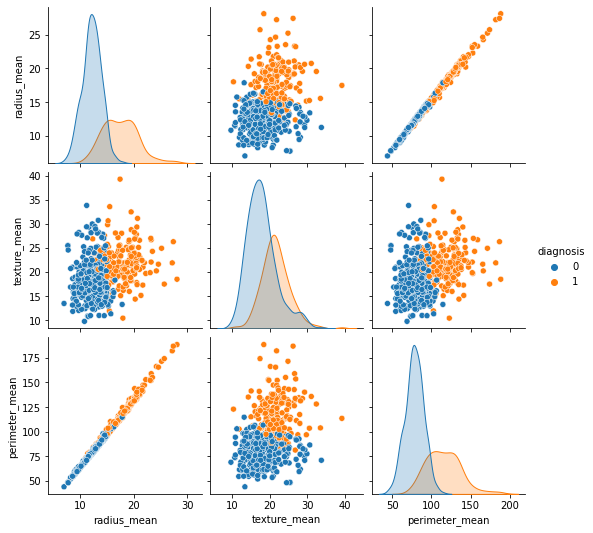

In [14]:
sns.pairplot(df.iloc[:,1:5], hue = "diagnosis" )

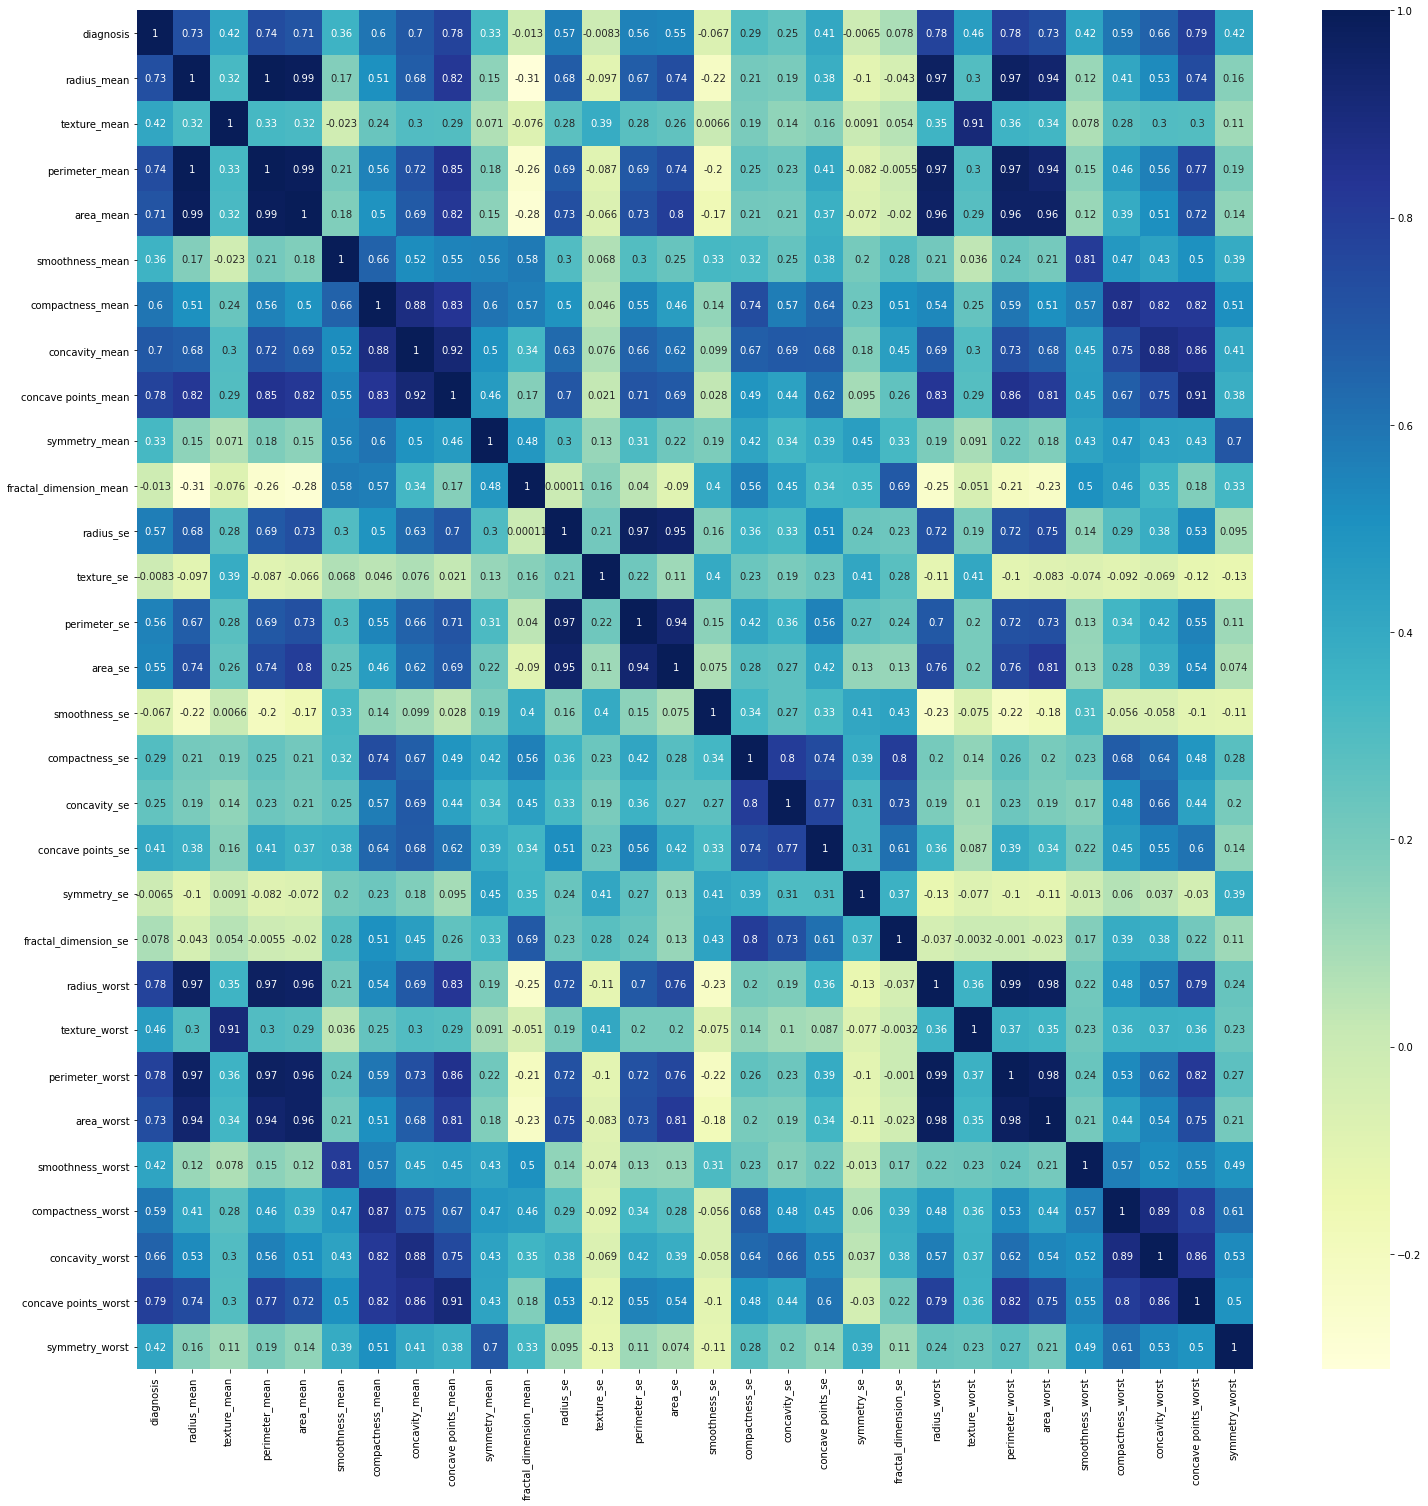

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(df.iloc[:,1:31].corr(), annot=True, cmap="YlGnBu")

In [18]:
x = df.iloc[:,2:15].values
x

array([[ 17.99  ,  10.38  , 122.8   , ...,   1.095 ,   0.9053,   8.589 ],
       [ 20.57  ,  17.77  , 132.9   , ...,   0.5435,   0.7339,   3.398 ],
       [ 19.69  ,  21.25  , 130.    , ...,   0.7456,   0.7869,   4.585 ],
       ...,
       [ 16.6   ,  28.08  , 108.3   , ...,   0.4564,   1.075 ,   3.425 ],
       [ 20.6   ,  29.33  , 140.1   , ...,   0.726 ,   1.595 ,   5.772 ],
       [  7.76  ,  24.54  ,  47.92  , ...,   0.3857,   1.428 ,   2.548 ]])

In [19]:
#Plit the data into X and y
#choosing columns with highest correlation score
cols = [2,4,5,8,9,22,24,25,29]
X = df[df.columns[cols]]
y = df[['diagnosis']]



In [20]:
#Divide the data into training and testing data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [21]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
#Function for training the models
def models(X_train, y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, y_train)

  #Decistion Tree 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
  tree.fit(X_train, y_train)

  #RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
  forest.fit(X_train, y_train)

  #model accuracy
  print("Logistic Regression Accuracy %: ", log.score(X_train, y_train))
  print("Decision Tree Accuracy %: ", tree.score(X_train, y_train))
  print("Random Forest Classifier Accuracy %: ", forest.score(X_train, y_train))

  return log, tree, forest

In [24]:
model = models(X_train, y_train)

Logistic Regression Accuracy %:  0.957286432160804
Decision Tree Accuracy %:  1.0
Random Forest Classifier Accuracy %:  0.9974874371859297


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [29]:
# Test models accuracy on test data
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print("Model: ", i)
  print(classification_report(y_test, model[i].predict(X_test)))
  print(accuracy_score(y_test, model[i].predict(X_test)))
  print()

Model:  0
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       108
           1       0.92      0.95      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

0.9532163742690059

Model:  1
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       108
           1       0.86      0.98      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.93       171
weighted avg       0.94      0.94      0.94       171

0.935672514619883

Model:  2
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weigh

In [30]:

#Testing
x = np.array([[17.99,10.38,122.8,1001,0.1184,0.2776,0.3,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.39,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601]])


In [31]:
#Testing
y_pred = model[0].predict(X_test)
print(y_pred)
print()
print(y_test.iloc[:,0].values)

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]


In [32]:
# Save model using pickle
import pickle 

data = {"model": model[0]}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [33]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]

In [34]:

y_pred = regressor_loaded.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,